Showing how the wave advances in 3D. This will be an animation in the supplementary material.

In [74]:
import spatialfunctions as sf
import numpy as np
import matplotlib.pyplot as plt

In [75]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens')

# Figsize consistent
figsize = (4,4)

/var/folders/l1/prbyqvgx4mg745chvp4d8x3r0000gn/T/ipykernel_15001/1535851650.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


In [76]:
# Set params
s = 0.99
N = 60
c = 1300
al= 0.001
p = 250

# Set up grid to be large enough given the dispersal kernel
xrexp = 19; dx=16;
xr = np.arange(-2**xrexp,2**xrexp+dx,step=dx)

# Get fopt for these params
fopt = sf.getfopt(p,c)

In [77]:
# Simulate

# Number of steps
nt = 200

# Get initial setup
x0 = sf.get_x0even(xrexp,dx,fopt,c,s,N)

# Iterate
wave = sf.iterate(xr,nt,fopt,x0,al,c,s,N)

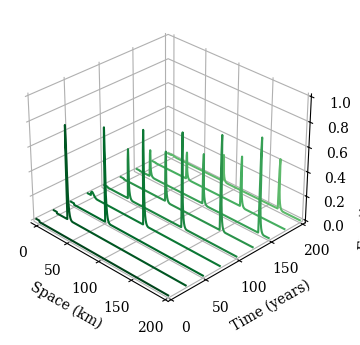

In [78]:
## Now plot

# Times to plot
tplot = np.arange(nt+1)[::25]

# Colors based on that
cm = cmap(np.linspace(0,1,num=len(tplot)+10))

# Limits in km
xlim = (-5,200)

# Plot as lines
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(projection='3d')
for i,t in enumerate(tplot):
    ax.plot(xr[int((2**xrexp+xlim[0]*1000)/dx):int((2**xrexp+xlim[1]*1000)/dx)]/1000, 
            wave[t,N+2,int((2**xrexp+xlim[0]*1000)/dx):int((2**xrexp+xlim[1]*1000)/dx)], 
            zs=t, zdir='y', c=cm[-(i+1)],zorder=-t) #zdir puts this at y=0
ax.set(xlim=xlim,ylim=(tplot[0],tplot[-1]),zlim=(0,1),
       xlabel='Space (km)',ylabel='Time (years)',zlabel='Fraction of infested trees')
ax.view_init(elev=30., azim=-45)

# Customize axes
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
#    axis._axinfo['grid']['color'] = (1, 1, 1, 0)
    axis.set_pane_color((1, 1, 1, 0))

fig.savefig('figures/travel3d.pdf',bbox_inches='tight')